In [55]:
import numpy as np
import pandas as pd

from prophet import Prophet
import plotly.express as px

rng = np.random.default_rng(seed=41)

# Parameters
num_days = 100
initial_price = 100.0
volatility = 0.01  # Daily volatility

# Generate random daily returns
daily_returns = np.random.normal(loc=0, scale=volatility, size=num_days)

# Calculate the cumulative sum of returns to get the price
price = initial_price * np.exp(np.cumsum(daily_returns))

data = pd.DataFrame(
    {"date": pd.date_range(start="01-01-2023", periods=len(price)), "price": price}
)

px.line(data_frame=data, x="date", y="price", markers="*")

In [49]:
# Python
m = Prophet()
m.fit(data.rename(columns={'date':'ds','price':'y'}))

20:24:28 - cmdstanpy - INFO - Chain [1] start processing
20:24:28 - cmdstanpy - INFO - Chain [1] done processing


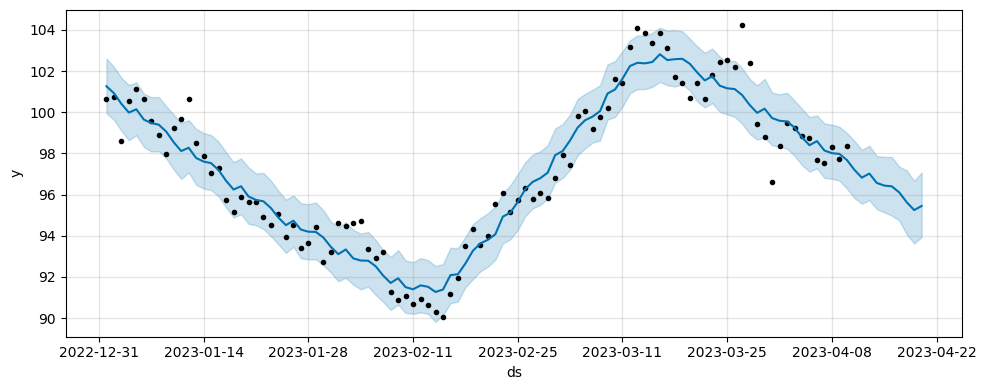

In [50]:
future = m.make_future_dataframe(periods=10)
forecast = m.predict(future)

fig = m.plot(forecast, figsize=(10, 4))

In [77]:
import yfinance as yf

ril = yf.Ticker("RELIANCE.NS")
ril_data = ril.history(period='48mo')
ril_data = ril_data.reset_index().rename(columns={'Date':'ds', 'Close':'y'})
ril_data['ds'] = ril_data['ds'].dt.tz_localize(None)

In [78]:
px.line(data_frame=ril_data,x='ds', y='y', markers='*')

20:48:10 - cmdstanpy - INFO - Chain [1] start processing
20:48:10 - cmdstanpy - INFO - Chain [1] done processing


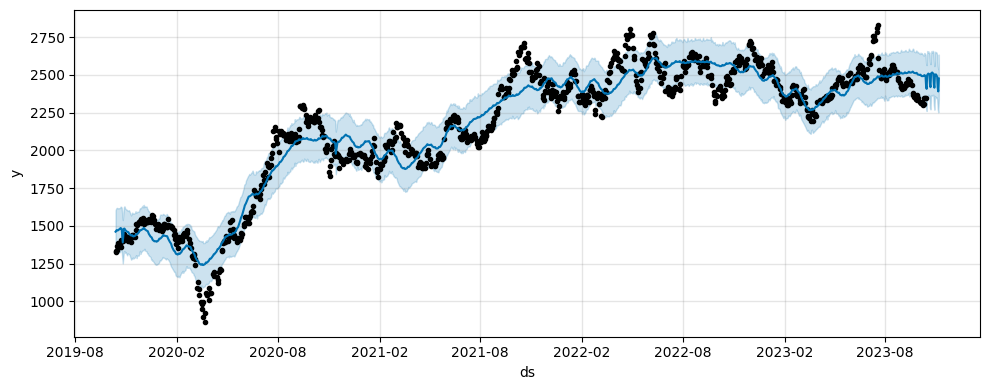

In [80]:
m = Prophet()
m.fit(ril_data)

future = m.make_future_dataframe(periods=24)
forecast = m.predict(future)

fig = m.plot(forecast, figsize=(10, 4))

In [83]:
import pandas as pd

data = pd.read_excel("../../../../Desktop/HOUSIE SONGS EXCEL FILE 90 SONGS.xlsx")
data = data.drop(columns=["SR. NO"])

songs = data['SONGS'].to_list()

import random

def generate_tambola_cards(
    num_cards=60,
    num_numbers_per_card=12,
    num_blanks_per_card=3,
    grid_rows=3,
    grid_columns=5,
    min_number=1,
    max_number=90,
):
    # Calculate total boxes per card
    total_boxes_per_card = num_numbers_per_card + num_blanks_per_card

    # Generate cards
    cards = []
    for _ in range(num_cards):
        # Generate a list of unique numbers for the card
        numbers_on_card = random.sample(
            range(min_number, max_number + 1), num_numbers_per_card
        )

        # Add blanks to the card
        blanks_on_card = ["" for _ in range(num_blanks_per_card)]
        card_content = numbers_on_card + blanks_on_card

        # Shuffle the content to randomize the placement of numbers and blanks
        random.shuffle(card_content)

        # Reshape the content into a 2D grid
        card_grid = []

        for i in range(0, len(card_content), grid_columns):
            cd = card_content[i : i + grid_columns]
            card_grid.append([songs[i-1] if isinstance(i, int) else i for i in cd ])
            

        # Add the card to the list
        cards.append(card_grid)

    return cards

cards = generate_tambola_cards(num_cards=40)

In [84]:
# Example usage
cards = generate_tambola_cards(num_cards=40)
# Example usage
cards = generate_tambola_cards()
for i, card in enumerate(cards):
    print(f"Card {i + 1}:")
    for row in card:
        print(row)
    print()

Card 1:
['હર ઘડી બદલ રહી હૈ... કલ હો ના હો', 'કઈ દૂર જબ દિન ઢલ જાય', 'જહાં મેં જાતી હૂ વહી ચલે આતે હો', 'આને વાલા પલ જાને વાલા હૈ (ગોલમાલ)', 'દિલ દીવાના બિન સજના કે...']
['નામ રે સબસે બડા તેરા નામ ઓ શેરાવાલી...', 'આજ સે પહેલે આજ સે જ્યાદા...', 'દિન મહિને સાલ ગુજરતે જાયેંગે…', 'આશાઓ કે સાવન મે', '']
['', 'જબ કોઈ બાત બિગડ જાયે…', 'કિસી ડિસ્કો મેં જાયે…', 'દિલ તો હે દિલ દિલ કા ઐતબાર…', '']

Card 2:
['ઇક દિન બીક જાયેગા…', 'આજ સે તેરી સારી ગલીયા મેરી હો ગઈ', '', 'પ્યાર દીવાના હોતા હૈ મસ્તાના હોતા હૈ', 'હર ઘડી બદલ રહી હૈ... કલ હો ના હો']
['ચંદન સા બદન... સરસ્વતીચંદ્ર', '', 'આજ સે પહેલે આજ સે જ્યાદા...', 'તુમસે મિલના બાતે કરના અચ્છા લગતા હૈ...', 'જબ કોઈ બાત બિગડ જાયે…']
['ભોલી સૂરત દિલ કે ખોટે...', 'તને જાતા જોઈ પનઘટની વાટે…', 'કિસી ડિસ્કો મેં જાયે…', '', 'યે શામ મસ્તાની...']

Card 3:
['', 'જૂઠ બોલે કૌવા કાટે', 'નામ રે સબસે બડા તેરા નામ ઓ શેરાવાલી...', '', 'ક્યુકી સાસ ભી કભી બહુથી...']
['MY_HEART_IS_BEATING…(JULEE)', 'ભોલી સૂરત દિલ કે ખોટે...', 'ઇક દિન બીક જાયેગા…', 'મેરે લિયે તુમ કાફી હો...'

In [10]:
print(cards[0])

[[51, '', 54, '', ''], [24, 1, 85, 15, 52], [68, 53, 14, 39, 79]]


In [5]:
data

,SONGS
0,ઇક દૂસરે સે કરતે હૈ પ્યાર હમ...(હમ ટાઇટલ)
1,આજ સે પહેલે આજ સે જ્યાદા...
2,આજ સે તેરી સારી ગલીયા મેરી હો ગઈ
3,આંખો સે દિલ મેં ઉતર કે
4,તને જાતા જોઈ પનઘટની વાટે…
...,...
85,યાદો કિ બારાત નીકલી હૈ...
86,આજા આજા દિલની ચોડે...ધેન ટેણેન (કમીને)
87,તુમ દિલ કી ધડકન હો...
88,દિલ દીવાના બિન સજના કે...
